In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
#Importing the Libraries and data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# Import the CSV file
# Print the Top five rows of the dataset
ev = pd.read_csv('/content/drive/MyDrive/ElectricCarData_Clean.csv')
ev.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [4]:
#Check available features
ev.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [5]:
#Full summary of the dataset
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [6]:
#Check the number of rows and columns
ev.shape

(103, 14)

In [7]:
#Check missing value
ev.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [8]:
#Check data type of each column
ev.dtypes

Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
FastCharge_KmH      object
RapidCharge         object
PowerTrain          object
PlugType            object
BodyStyle           object
Segment             object
Seats                int64
PriceEuro            int64
dtype: object

In [9]:
#Check data type of each column
ev.dtypes

Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
FastCharge_KmH      object
RapidCharge         object
PowerTrain          object
PlugType            object
BodyStyle           object
Segment             object
Seats                int64
PriceEuro            int64
dtype: object

In [10]:
#Descriptive Statistics of the dataset
ev.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

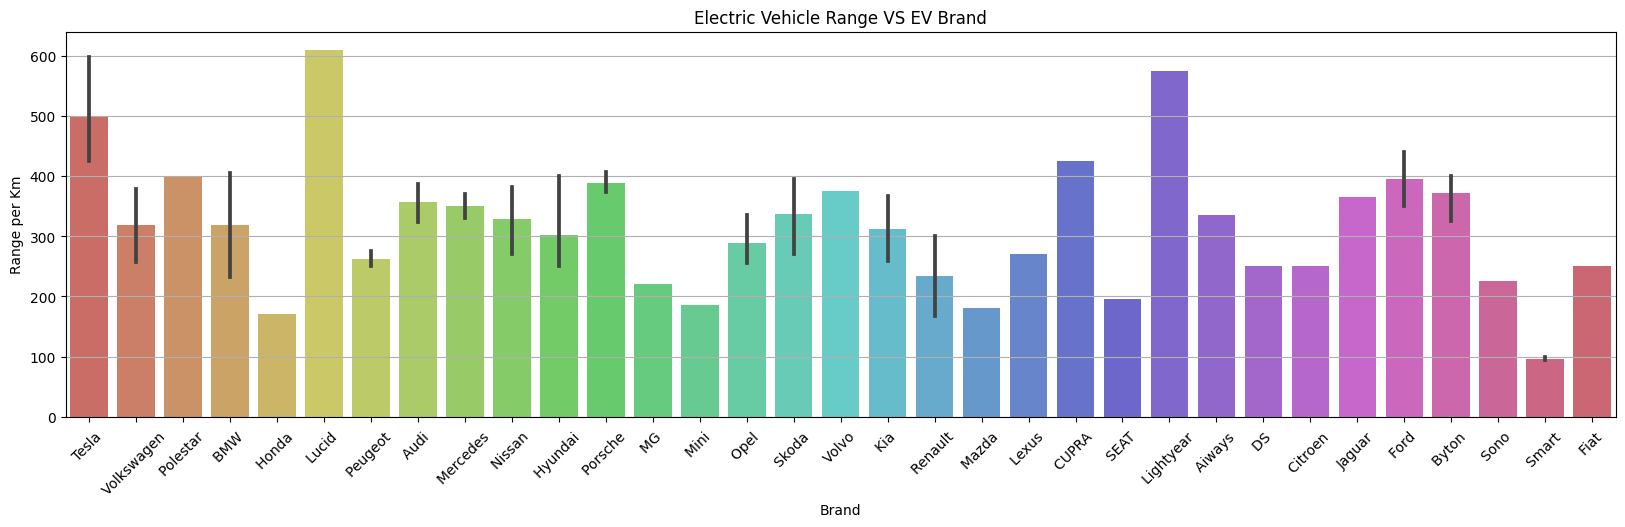

In [12]:
#Analysis range by EV Brand
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Range_Km',data=ev,palette='hls')
plt.grid(axis='y')
plt.title('Electric Vehicle Range VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('Range per Km')
plt.xticks(rotation=45)

In [13]:
range_df = ev.sort_values(by=['Range_Km'], ascending=False)
range_df[['Brand','Model','Range_Km']].head(n=1)

,Brand,Model,Range_Km
51,Tesla,Roadster,970


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

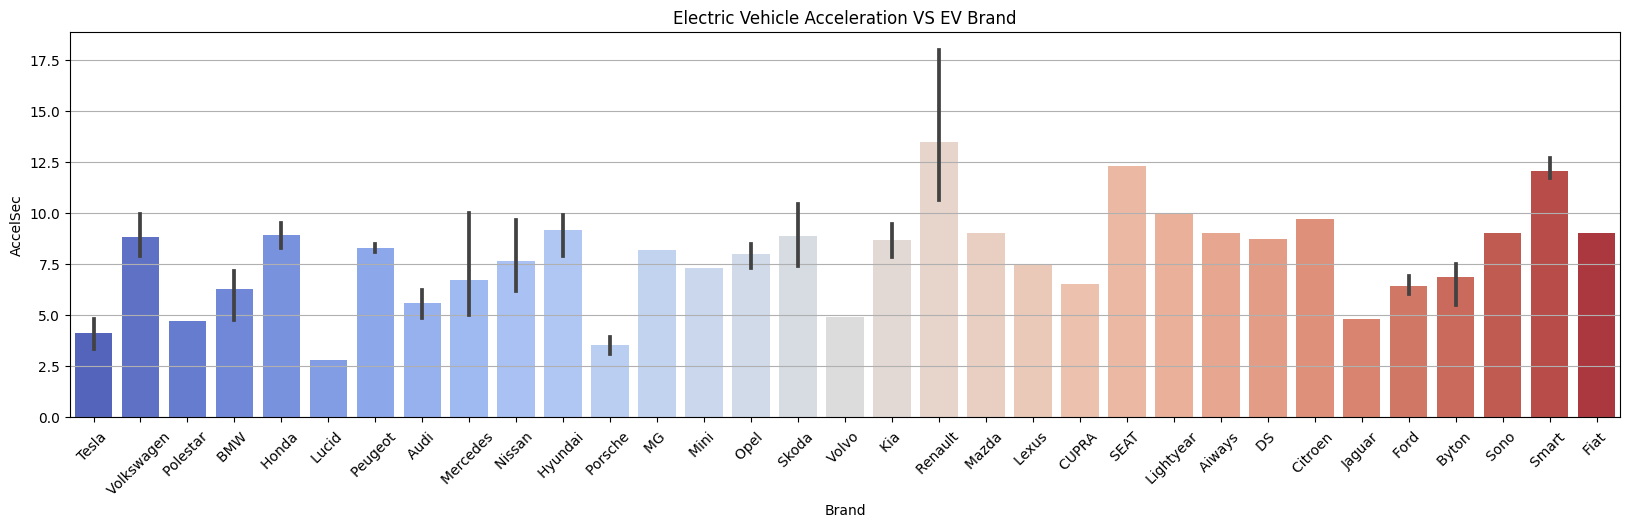

In [14]:
#Analysis acceleration by EV Brand
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='AccelSec',data=ev,palette='coolwarm')
plt.grid(axis='y')
plt.title('Electric Vehicle Acceleration VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('AccelSec')
plt.xticks(rotation=45)

In [15]:
df = ev.sort_values(by=['AccelSec'], ascending=True)
df[['Brand','Model','AccelSec']].head(n=1)

,Brand,Model,AccelSec
51,Tesla,Roadster,2.1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

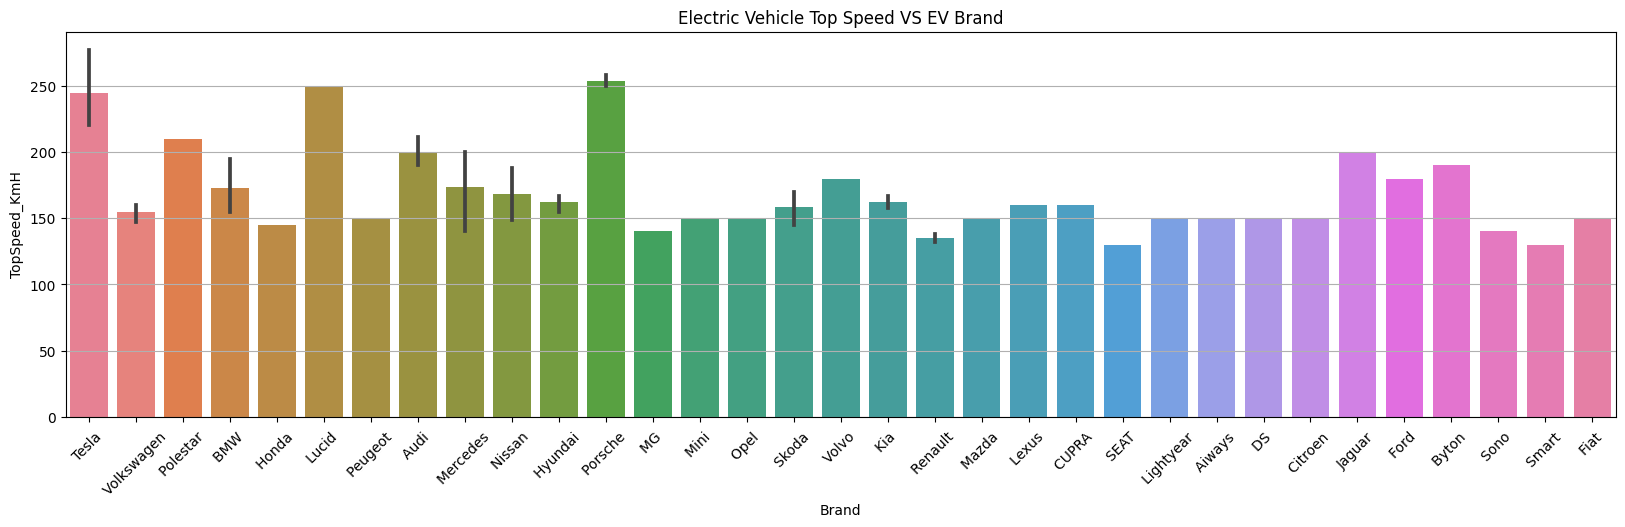

In [16]:
#Analysis top speed by EV Brand
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='TopSpeed_KmH',data=ev,palette='husl')
plt.grid(axis='y')
plt.title('Electric Vehicle Top Speed VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('TopSpeed_KmH')
plt.xticks(rotation=45)

In [17]:
speed_df = ev.sort_values(by=['TopSpeed_KmH'], ascending=False)
speed_df[['Brand','Model','TopSpeed_KmH']].head(n=1)

,Brand,Model,TopSpeed_KmH
51,Tesla,Roadster,410


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

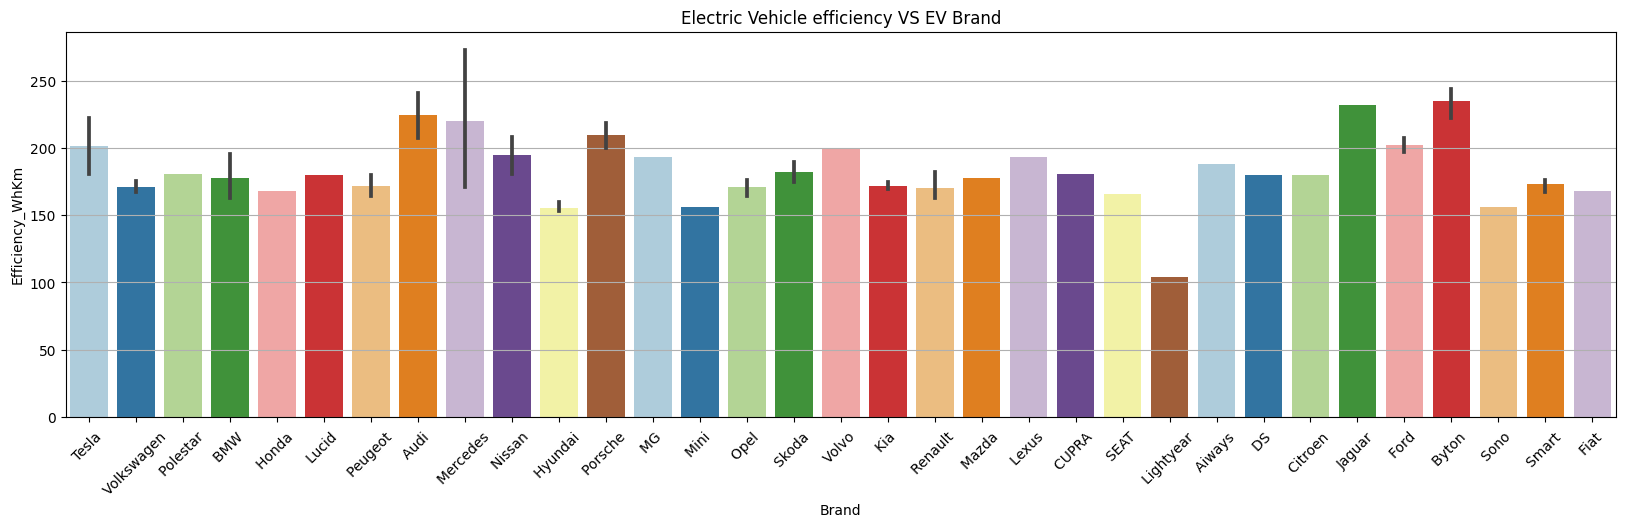

In [18]:
#Analysis efficiency by EV Brand
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Efficiency_WhKm',data=ev,palette='Paired')
plt.grid(axis='y')
plt.title('Electric Vehicle efficiency VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency_WhKm')
plt.xticks(rotation=45)

In [19]:
eff_df = ev.sort_values(by=['Efficiency_WhKm'], ascending=False)
eff_df[['Brand','Model','Efficiency_WhKm']].head(n=1)

,Brand,Model,Efficiency_WhKm
84,Mercedes,EQV 300 Long,273


In [20]:
seat_df = ev.sort_values(by=['Seats'], ascending=False)
seat_df[['Brand','Model','Range_Km', 'Seats']].head(n=1)

,Brand,Model,Range_Km,Seats
21,Tesla,Model Y Long Range Dual Motor,425,7


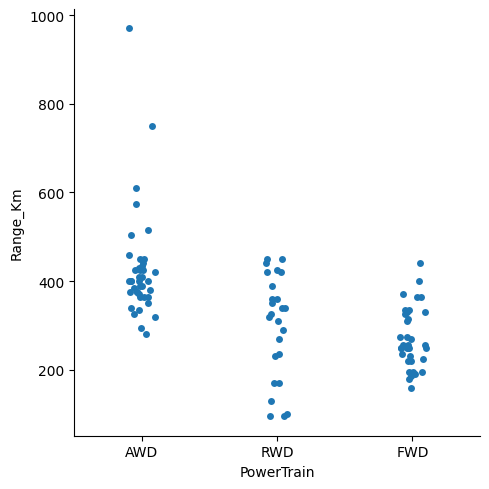

In [21]:
##Distribution of range with PowerTrain
fig, axs = plt.subplots(1,2)
sns.catplot(x="PowerTrain", y="Range_Km", data=ev)
plt.close(1)

In [22]:
ev.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [23]:
ev1 = ev[['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']]

In [24]:
print(ev1)

# define ordinal encoding
encoder = OrdinalEncoder()

# transform data
result = encoder.fit_transform(ev1)
print(result)

           Brand                            Model PowerTrain RapidCharge  \
0         Tesla     Model 3 Long Range Dual Motor        AWD         Yes   
1    Volkswagen                         ID.3 Pure        RWD         Yes   
2      Polestar                                 2        AWD         Yes   
3           BMW                              iX3         RWD         Yes   
4         Honda                                e         RWD         Yes   
..           ...                              ...        ...         ...   
98       Nissan                       Ariya 63kWh        FWD         Yes   
99         Audi     e-tron S Sportback 55 quattro        AWD         Yes   
100      Nissan               Ariya e-4ORCE 63kWh        AWD         Yes   
101      Nissan   Ariya e-4ORCE 87kWh Performance        AWD         Yes   
102       Byton                 M-Byte 95 kWh 2WD        AWD         Yes   

       PlugType  BodyStyle Segment  
0    Type 2 CCS      Sedan       D  
1    Type 2 C

In [25]:
temp = ['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']

In [26]:
ev.drop(temp,axis=1,inplace=True)

In [27]:
result = pd.DataFrame(result)

In [28]:
result.columns=["Brand", "Model", "PowerTrain", 'RapidCharge', "PlugType", "BodyStyle", "Segment"]
result.index+=1

In [29]:
result

,Brand,Model,PowerTrain,RapidCharge,PlugType,BodyStyle,Segment
1,30.0,46.0,0.0,1.0,2.0,7.0,3.0
2,31.0,33.0,2.0,1.0,2.0,1.0,2.0
3,23.0,0.0,0.0,1.0,2.0,2.0,3.0
4,2.0,101.0,2.0,1.0,2.0,6.0,3.0
5,9.0,78.0,2.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...
99,20.0,6.0,1.0,1.0,2.0,1.0,2.0
100,1.0,94.0,0.0,1.0,2.0,6.0,4.0
101,20.0,8.0,0.0,1.0,2.0,1.0,2.0
102,20.0,10.0,0.0,1.0,2.0,1.0,2.0


In [30]:
ev1 = ev
ev1.index+=1

In [31]:
ev1[['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']] = result[['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']]
ev

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,Brand,Model,PowerTrain,RapidCharge,PlugType,BodyStyle,Segment
1,4.6,233,450,161,940,5,55480,30.0,46.0,0.0,1.0,2.0,7.0,3.0
2,10.0,160,270,167,250,5,30000,31.0,33.0,2.0,1.0,2.0,1.0,2.0
3,4.7,210,400,181,620,5,56440,23.0,0.0,0.0,1.0,2.0,2.0,3.0
4,6.8,180,360,206,560,5,68040,2.0,101.0,2.0,1.0,2.0,6.0,3.0
5,9.5,145,170,168,190,4,32997,9.0,78.0,2.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,7.5,160,330,191,440,5,45000,20.0,6.0,1.0,1.0,2.0,1.0,2.0
100,4.5,210,335,258,540,5,96050,1.0,94.0,0.0,1.0,2.0,6.0,4.0
101,5.9,200,325,194,440,5,50000,20.0,8.0,0.0,1.0,2.0,1.0,2.0
102,5.1,200,375,232,450,5,65000,20.0,10.0,0.0,1.0,2.0,1.0,2.0


In [32]:
#Check correlation between different features
ev.corr()

<ipython-input-32-8f1188b9d09e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ev.corr()


,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro,Brand,Model,PowerTrain,RapidCharge,PlugType,BodyStyle,Segment
AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.175335,-0.627174,0.062730,-0.050635,0.521011,-0.514820,-0.259657,-0.347164,-0.451568
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.126470,0.829057,0.101759,0.067814,-0.560538,0.251054,-0.010110,0.339230,0.670403
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.300163,0.674844,0.088316,-0.066035,-0.451495,0.401290,0.131297,0.227477,0.628597
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.301230,0.396705,-0.195901,0.010976,-0.394721,0.105673,-0.028761,0.373146,0.623263
Seats,-0.175335,0.126470,0.300163,0.301230,1.000000,0.020920,0.089589,-0.018943,-0.278882,0.423111,-0.029570,0.342489,0.416744
PriceEuro,-0.627174,0.829057,0.674844,0.396705,0.020920,1.000000,-0.036023,0.169003,-0.561584,0.197208,-0.000193,0.321713,0.737106
Brand,0.062730,0.101759,0.088316,-0.195901,0.089589,-0.036023,1.000000,-0.401572,0.056464,-0.188137,-0.231104,-0.275860,-0.002040
Model,-0.050635,0.067814,-0.066035,0.010976,-0.018943,0.169003,-0.401572,1.000000,-0.007609,0.144293,0.023750,0.261255,0.068414
PowerTrain,0.521011,-0.560538,-0.451495,-0.394721,-0.278882,-0.561584,0.056464,-0.007609,1.000000,-0.274797,-0.039763,-0.349484,-0.497850
RapidCharge,-0.514820,0.251054,0.401290,0.105673,0.423111,0.197208,-0.188137,0.144293,-0.274797,1.000000,0.539160,0.223577,0.189954


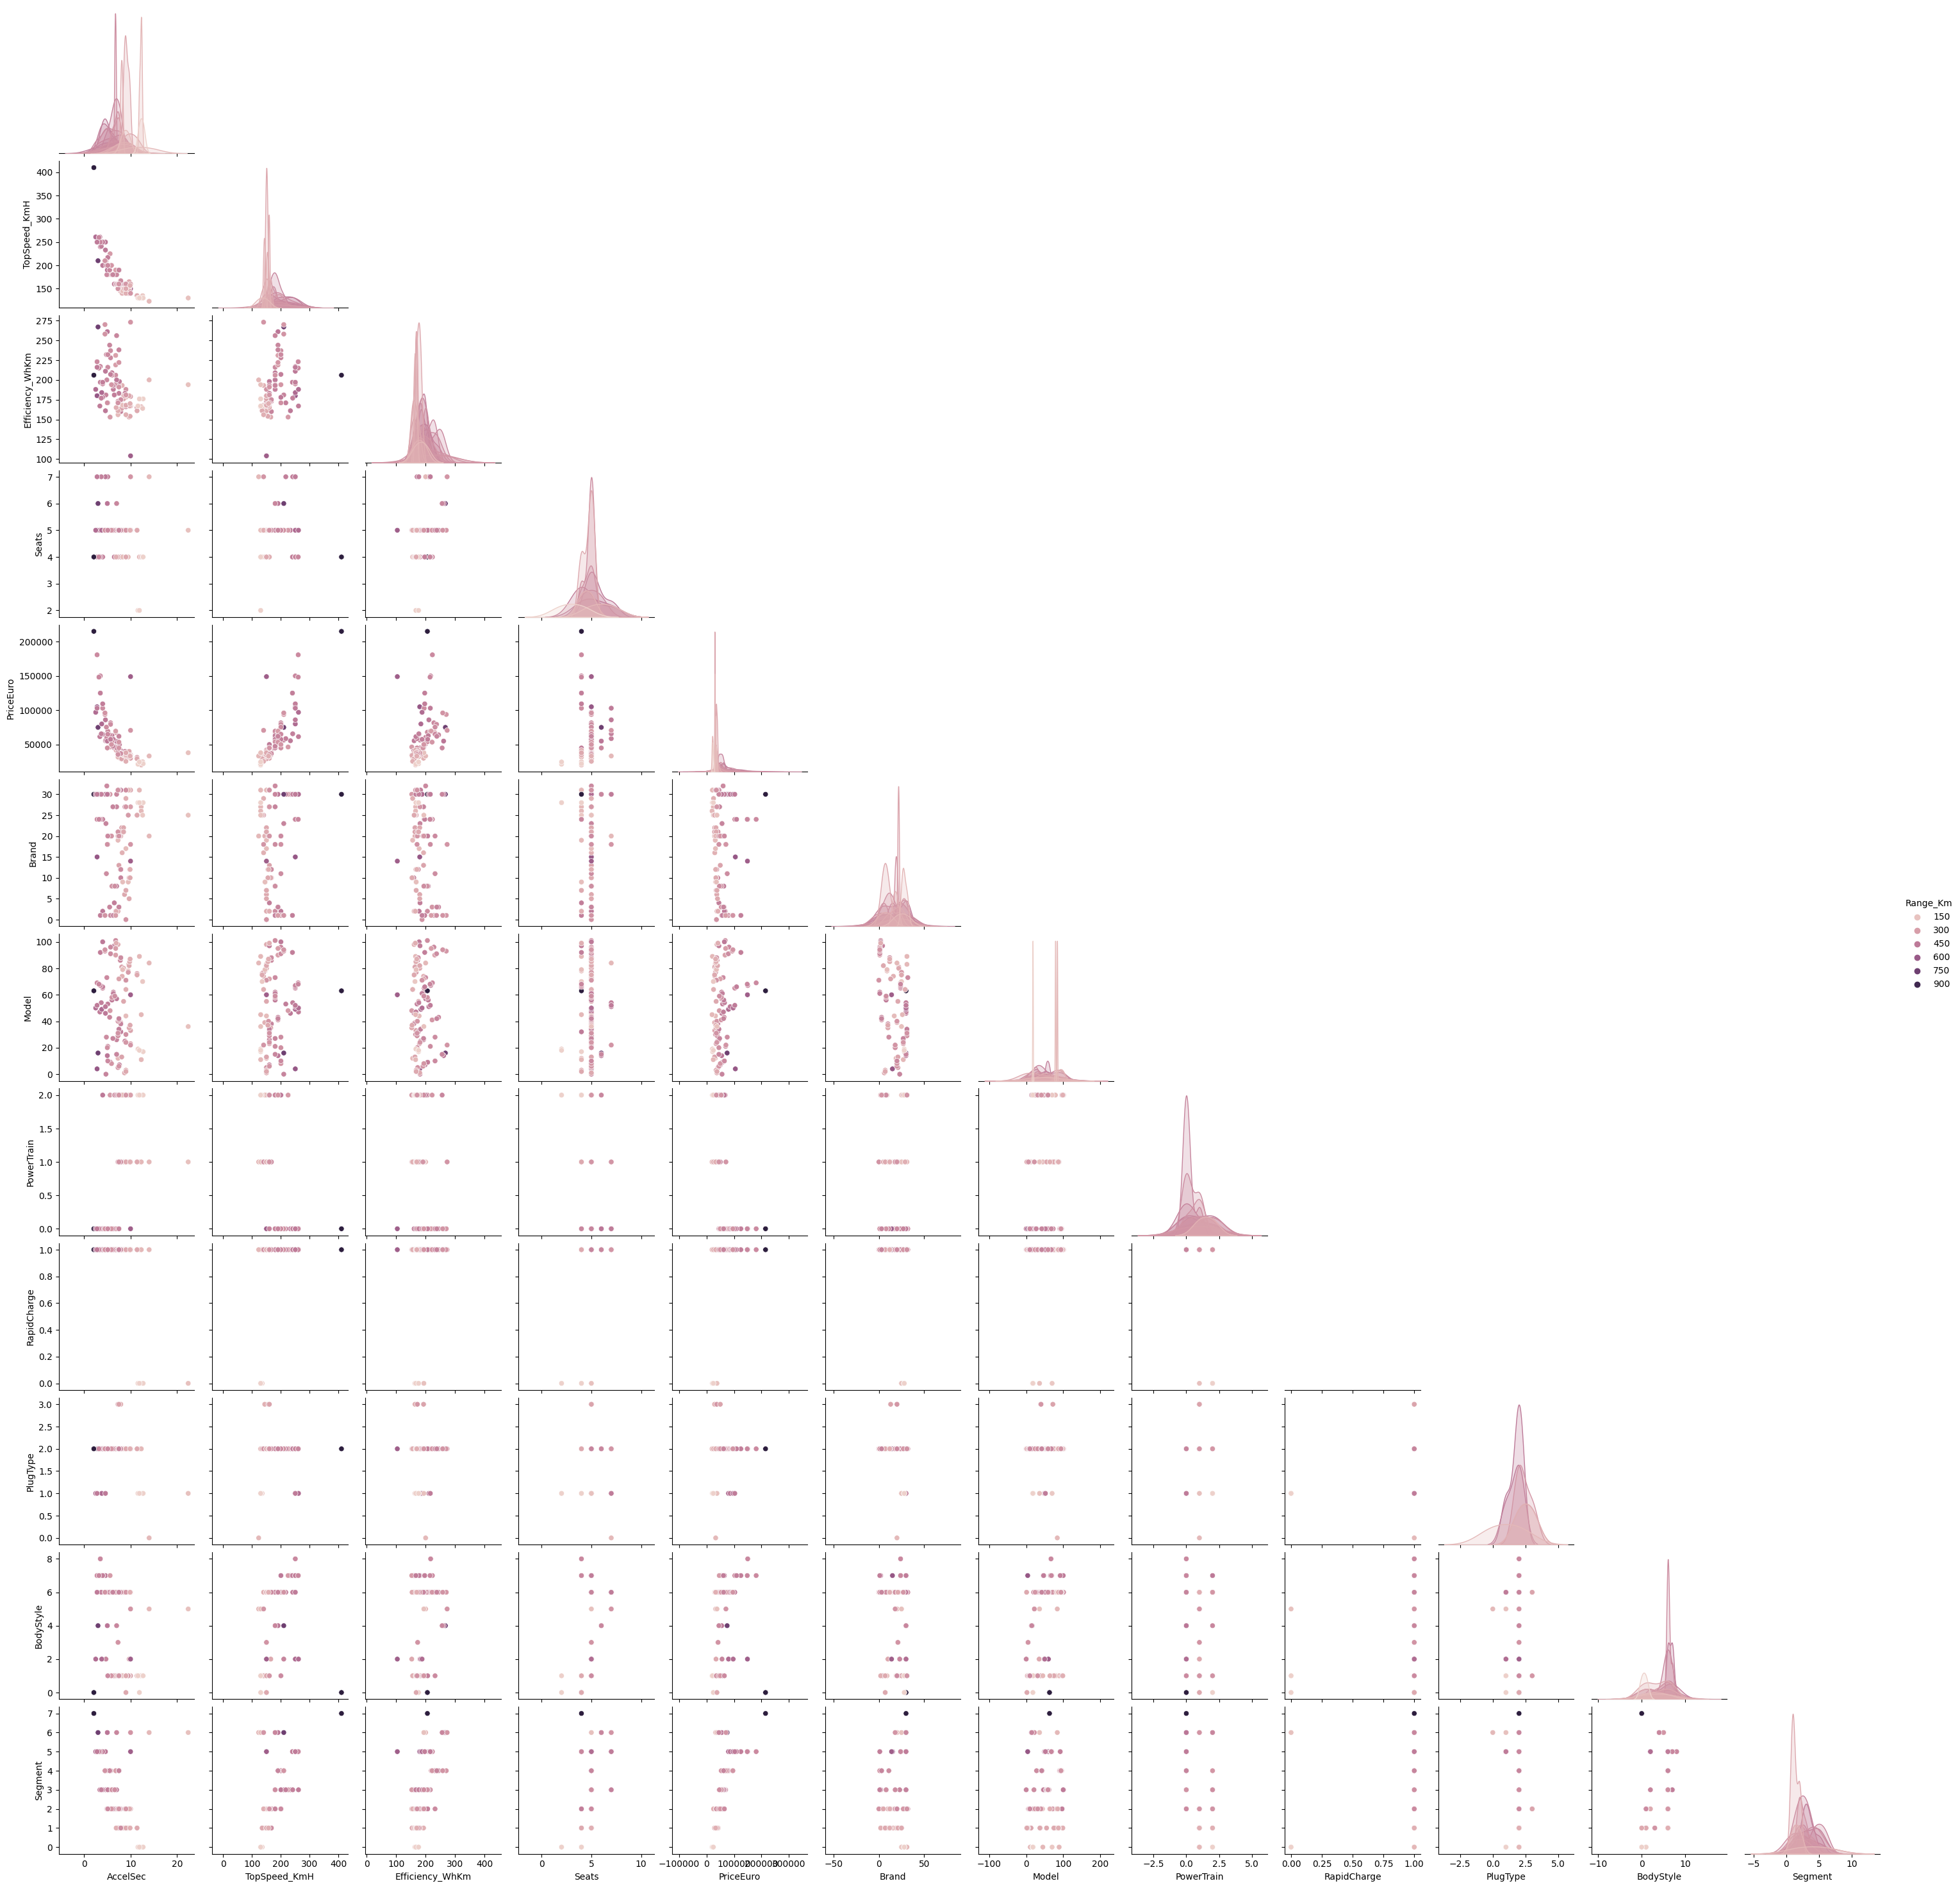

In [33]:
#Pairplot show the correlation of the data
sns.pairplot(ev,
             corner = True,
             kind = 'scatter',
             hue = 'Range_Km')
plt.show()

<ipython-input-34-13468b2018ce>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ev.corr(),linewidths=1,linecolor='white',annot=True)


<Axes: >

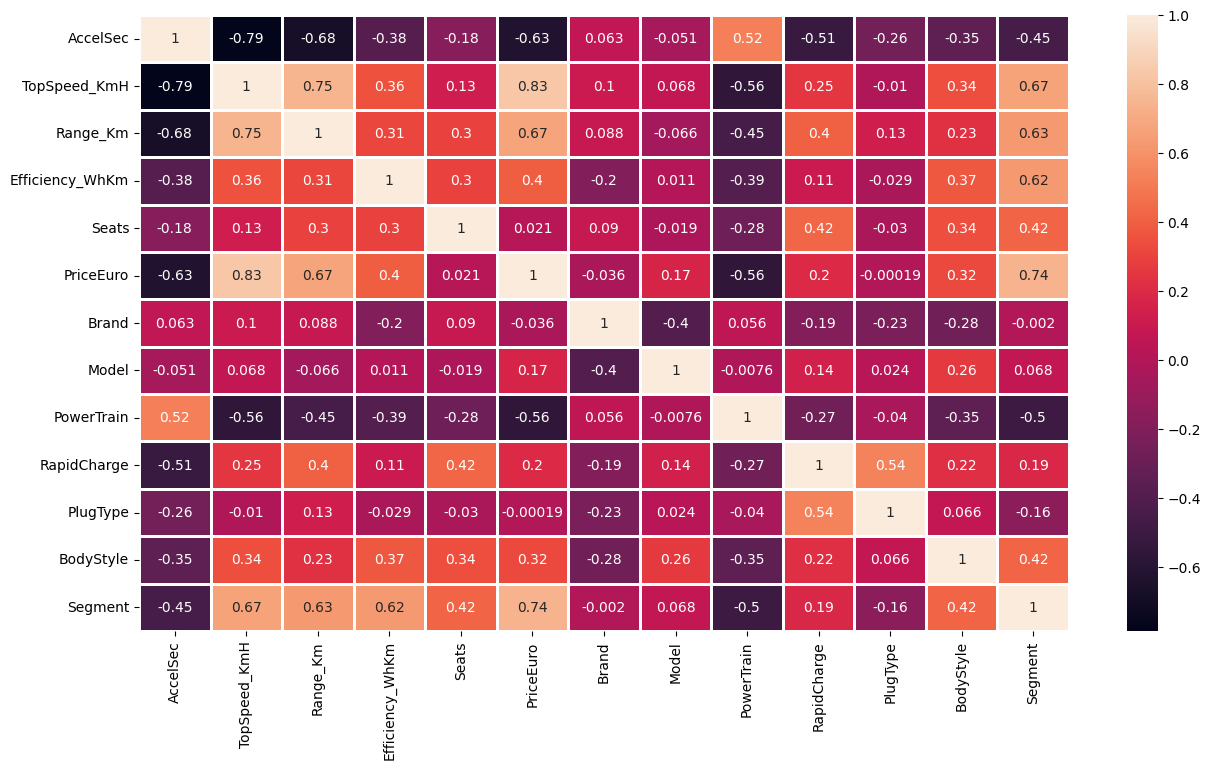

In [34]:
#Heatmap to show the correlation of the data
ax= plt.figure(figsize=(15,8))
sns.heatmap(ev.corr(),linewidths=1,linecolor='white',annot=True)

In [35]:
#Define the target value(dependant variable) as y
X = ev['TopSpeed_KmH'].values.reshape(-1,1)
y = ev['Range_Km']

In [36]:
#Training and Test Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
## Check Shape, Sample of Test Train Data
print("X_train : ",X_train.shape)

print("X_test : ",X_test.shape)

print("y_train : ",y_train.shape)

print("y_test : ",y_test.shape)

X_train :  (82, 1)
X_test :  (21, 1)
y_train :  (82,)
y_test :  (21,)


In [39]:
# Create Linear Model
lr = LinearRegression()

#Model Fitting
lr.fit(X_train, y_train)

LinearRegression()

In [40]:
#We can output a prediction
y_pred = lr.predict(X_test)
y_pred[0:5]


array([359.60303889, 359.60303889, 292.8263226 , 493.15647147,
       381.86194432])

In [41]:
#Predict the range of this EV using linear regression model.

# TopSpeed_Kmh = 248

EV_pred = lr.predict([[248]])
print(EV_pred)

[488.70469038]


In [42]:
# Check Coefficient
lr.coef_

array([2.22589054])

In [43]:
#Check intercept
lr.intercept_

-63.3161642577993

(0.0, 1013.75)

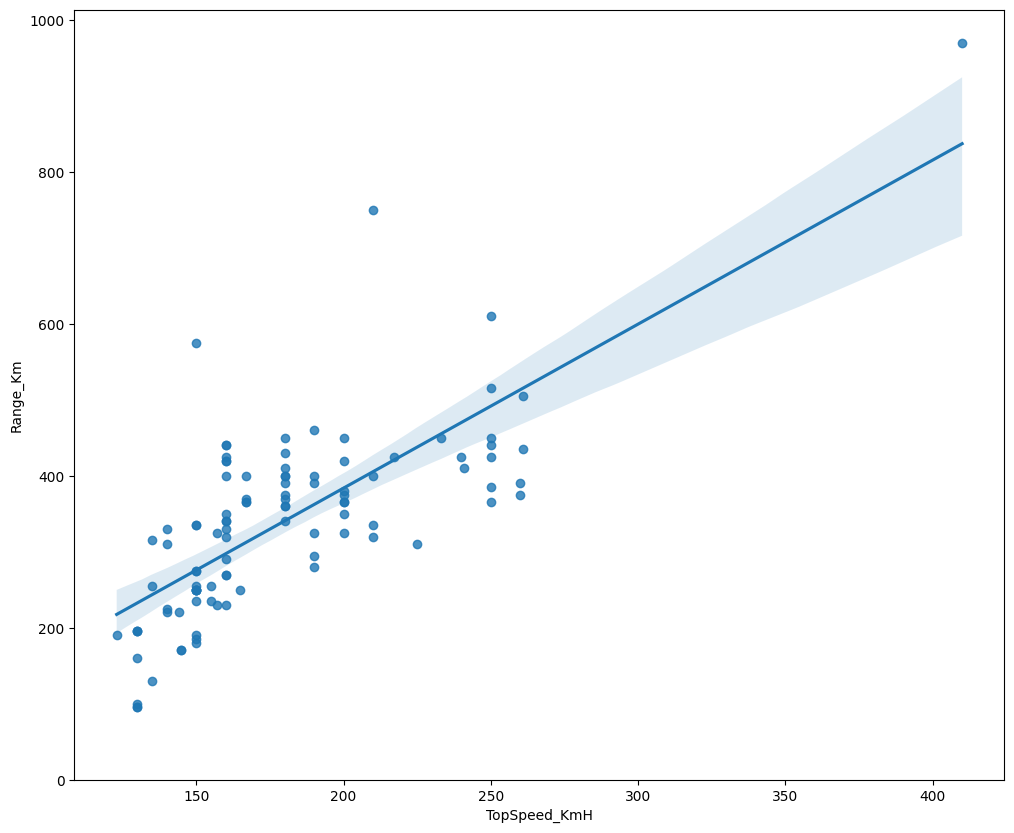

In [44]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="TopSpeed_KmH", y="Range_Km", data=ev)
plt.ylim(0,)

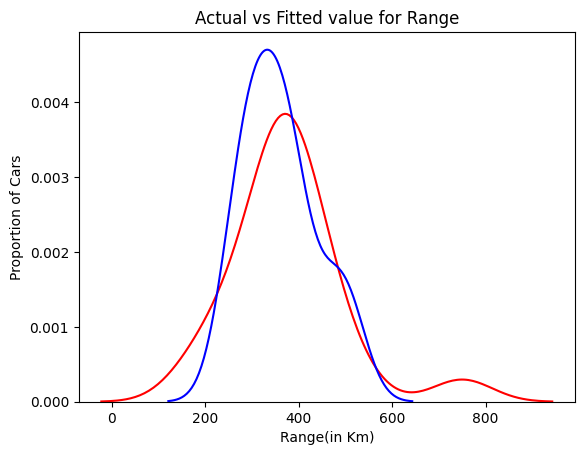

In [45]:
ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred, color="b", label="Fitted Values", ax=ax1)
plt.title('Actual vs Fitted value for Range')
plt.xlabel('Range(in Km)')
plt.ylabel('Proportion of Cars')
plt.show()
plt.close()

In [46]:
# Calculate the score for Training Data
lr.score(X_train, y_train)
print("R2 for Traing Data: ", lr.score(X_train, y_train))

R2 for Traing Data:  0.6297694922844455


In [47]:
# Calculate the score (R^2 for Regression) for Testing Data
lr.score(X_test, y_test)
print("R2 for Testing Data: ", lr.score(X_test, y_test))

R2 for Testing Data:  0.15363068038695216


In [48]:
#Calculate Mean Squared Error
mean_squared_error(y_test, y_pred)
print("MSE: ", mean_squared_error(y_test, y_pred))

MSE:  11242.893676247608


In [49]:
#Calculate Mean Absolute Error(MAE)
mean_absolute_error(y_test, y_pred)
print("MAE: ",mean_absolute_error(y_test, y_pred))

MAE:  78.18137850937941


In [50]:
#Calculate Root Mean Squared Error(RMSE)

print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  106.03251235469057


In [51]:
# Predictors
X = ev[['TopSpeed_KmH','Efficiency_WhKm','Segment','Seats','AccelSec','PriceEuro']]

In [52]:
# Target
y = ev['Range_Km']

In [53]:
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [54]:
## Flag intermediate output

show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

# Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the training data
n = X_train.shape[0]

r2_list = []
adjusted_r2_list = []

while True:
    changed = False

    if show_steps:
        print('')

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))

    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))

    # for each remaining feature to be evaluated
    for new_column in excluded:

        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)

        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' %
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' %
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    r2_list.append(best['r2'])
    adjusted_r2_list.append(best['a_r2'])

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' %
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = PriceEuro, Efficiency_WhKm, TopSpeed_KmH, AccelSec, Seats, Segment
(Step) Trying PriceEuro...
(Step) - Features = PriceEuro
(Step) - Adjusted R^2: This = 0.549; Best = 0.000
(Step) - New Best!   : Feature = PriceEuro; R^2 = 0.554; Adjusted R^2 = 0.549
(Step) Trying Efficiency_WhKm...
(Step) - Features = Efficiency_WhKm
(Step) - Adjusted R^2: This = 0.064; Best = 0.549
(Step) Trying TopSpeed_KmH...
(Step) - Features = TopSpeed_KmH
(Step) - Adjusted R^2: This = 0.625; Best = 0.549
(Step) - New Best!   : Feature = TopSpeed_KmH; R^2 = 0.630; Adjusted R^2 = 0.625
(Step) Trying AccelSec...
(Step) - Features = AccelSec
(Step) - Adjusted R^2: This = 0.452; Best = 0.625
(Step) Trying Seats...
(Step) - Features = Seats
(Step) - Adjusted R^2: This = 0.055; Best = 0.625
(Step) Trying Segment...
(Step) - Features = Segment
(Step) - Adjusted R^2: This = 0.382; Best = 0.625
Added feature TopSpeed_KmH with R^2 = 0.630 and adjusted R^2 = 0.625

(Step) Excluded = PriceEuro, Efficiency

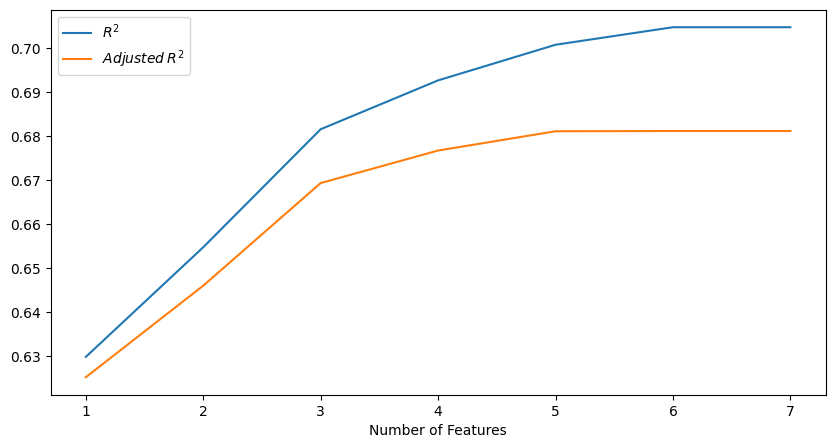

In [55]:
## Display both R^2 and Adjusted R^2

_range = range(1, len(r2_list)+1)

# define chart size
plt.figure(figsize = (10, 5))
# plot each metric
plt.plot(_range, r2_list, label = '$R^2$')
plt.plot(_range, adjusted_r2_list, label = '$Adjusted \: R^2$')
# add some better visualisation
plt.xlabel('Number of Features')
plt.legend()
# output the chart
plt.show()

In [56]:
#Create a Base Model Using Linear Regression
model = LinearRegression()
# Fit
model.fit(X,y)

LinearRegression()

In [57]:
# Check Coeffiricent
model.coef_

array([ 7.47717179e-01, -6.22509843e-01,  1.65787415e+01,  2.57670219e+01,
       -1.24305613e+01,  6.04144393e-04])

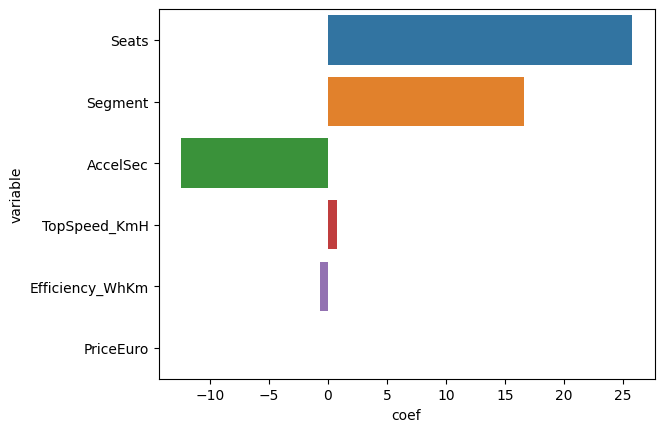

In [58]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="coef", y="variable", data=model_coefs)
# Plot Coefficients
view_coeff(X, model)

In [59]:
## Calculate Ridge Regression model

# create a model object to hold the modelling parameters
ridgemodel = Ridge()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200) #lambda in the slides

# Train the model with different regularisation strengths
for a in ridge_alphas:
    ridgemodel.set_params(alpha = a)
    ridgemodel.fit(X, y)
    coefs.append(ridgemodel.coef_)
    errors.append(mean_squared_error(ridgemodel.coef_, model.coef_))

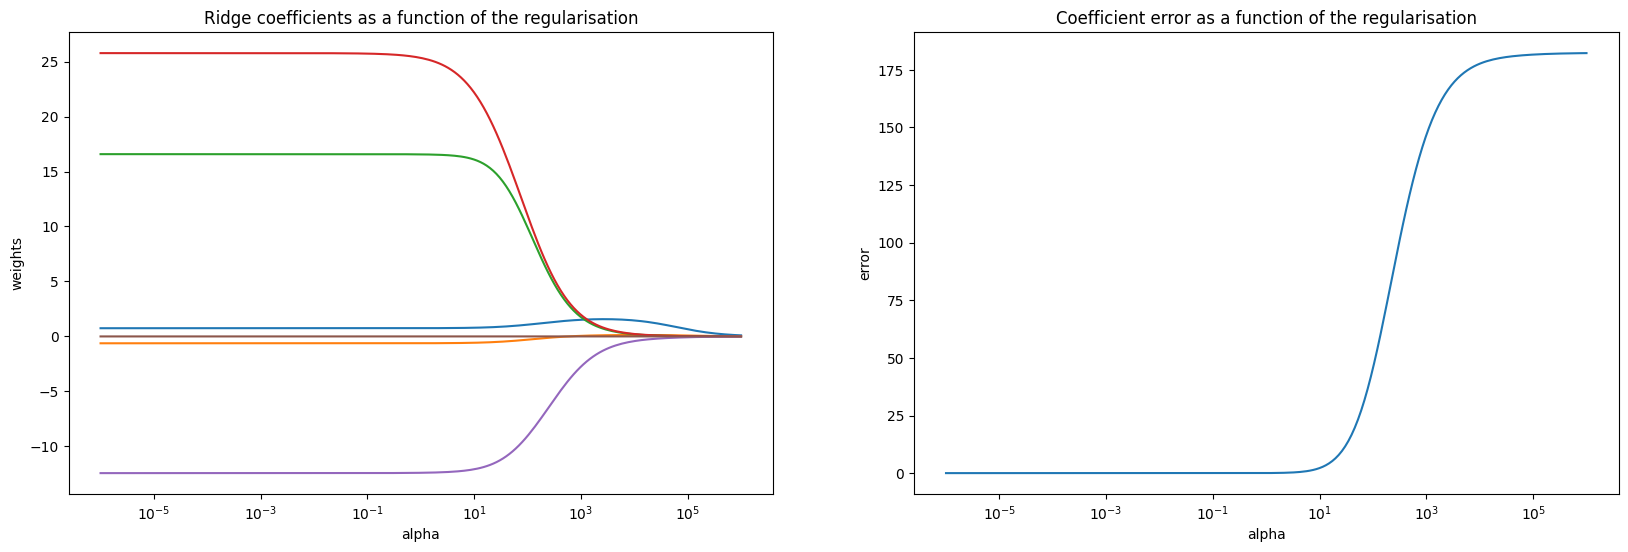

In [60]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

In [61]:
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X, y)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X, y))

Alpha: 19.791668678535572
Score: 0.6467904685229368


In [62]:
optimal_ridge.coef_

array([ 8.33733337e-01, -5.29343039e-01,  1.53156424e+01,  1.97312130e+01,
       -1.16862263e+01,  5.71635752e-04])

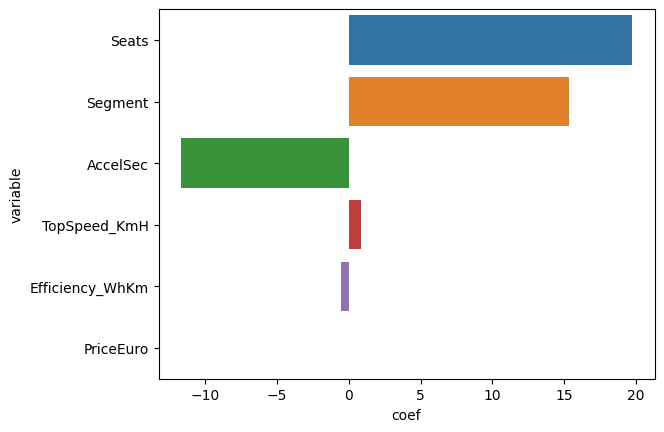

In [63]:
# Plot Coefficient
view_coeff(X, optimal_ridge)

In [64]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

68.50082915686325
0.7047900146524513
98.54263271897918
0.26897853326748533


In [65]:
## Calculate Lasso Regression model

# create a model object to hold the modelling parameters
lassomodel = Lasso()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
lasso_alphas = np.logspace(-6, 6, 200) #lambda in the slides

# Train the model with different regularisation strengths
for a in lasso_alphas:
    lassomodel.set_params(alpha = a)
    lassomodel.fit(X, y)
    coefs.append(lassomodel.coef_)
    errors.append(mean_squared_error(lassomodel.coef_, model.coef_))

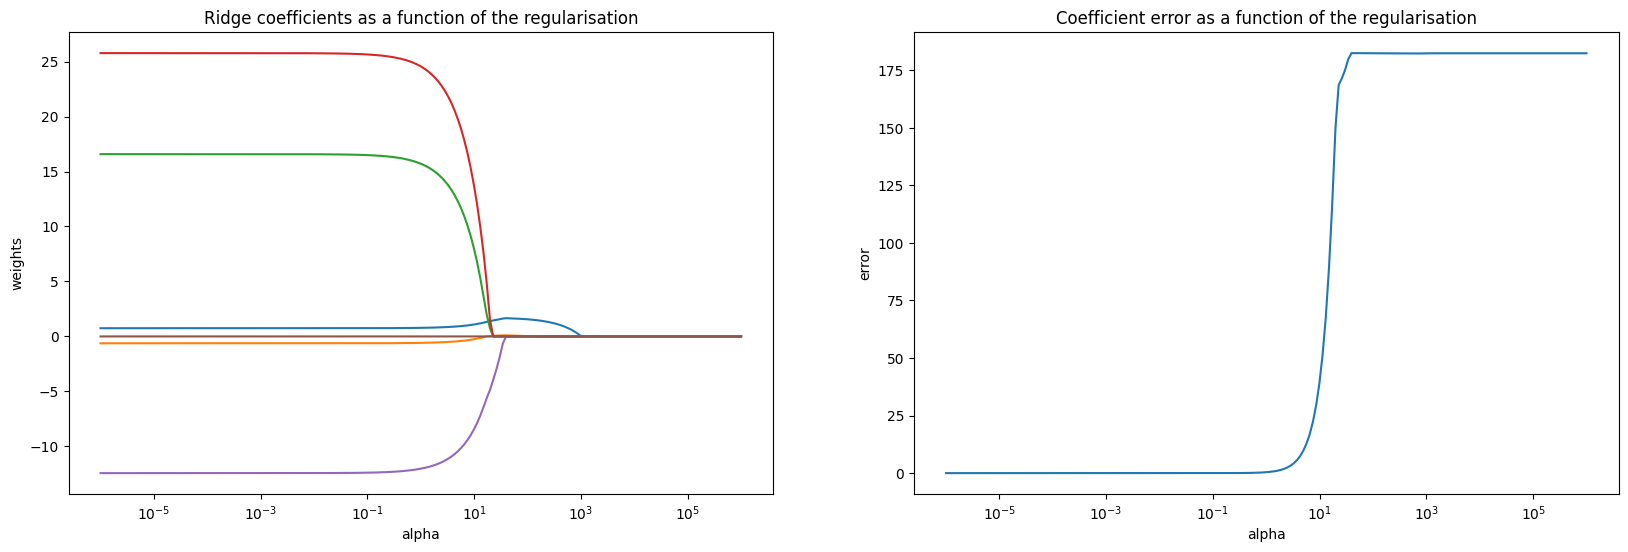

In [66]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(lasso_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(lasso_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

In [67]:
# Find Optimal Lasso Using LassoCV

# create a model object to hold the modelling parameters
optimal_lasso = LassoCV(alphas=lasso_alphas, cv=10)

optimal_lasso.fit(X, y)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X, y))

Alpha: 482.41087041653736
Score: 0.5423596191706892


In [68]:
optimal_lasso.coef_

array([ 0.91176137,  0.        ,  0.        ,  0.        , -0.        ,
        0.00152598])

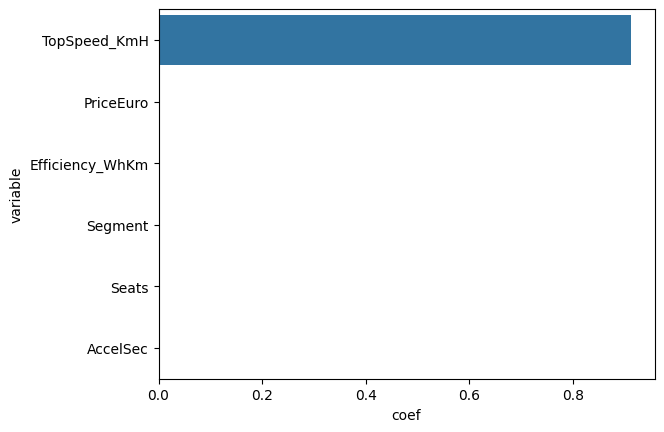

In [69]:
# Plot Coefficient
view_coeff(X, optimal_lasso)

In [70]:
# Ridge model residuals
optimal_ridge.fit(X_train, y_train)
prediction = optimal_ridge.predict(X_test)
residual_ridge = (y_test - prediction)
print(residual_ridge)

31     -80.653722
68     120.792391
63     135.718933
48    -117.533883
43     -14.067880
41      67.909563
91    -100.717517
46      72.637466
11      15.012017
1       57.864079
19     -32.057118
32      75.420670
98     -14.274991
86     -21.932045
77      72.053241
5      -93.644847
80    -173.389035
34     358.472251
13     100.226171
27      70.433793
101    -21.412395
Name: Range_Km, dtype: float64


In [71]:
# Lasso model residuals
optimal_lasso.fit(X_train, y_train)
prediction = optimal_lasso.predict(X_test)
residual_lasso = (y_test - prediction)
print(residual_lasso)

31     -83.715045
68     113.593859
63     136.640227
48    -120.645532
43     -15.731764
41      61.505778
91    -104.779162
46      71.666541
11      15.321647
1       51.259567
19     -31.318471
32      74.890551
98     -19.305206
86     -20.195942
77      72.106718
5      -91.523348
80    -171.186623
34     351.552557
13     101.122874
27      70.450825
101    -26.417441
Name: Range_Km, dtype: float64


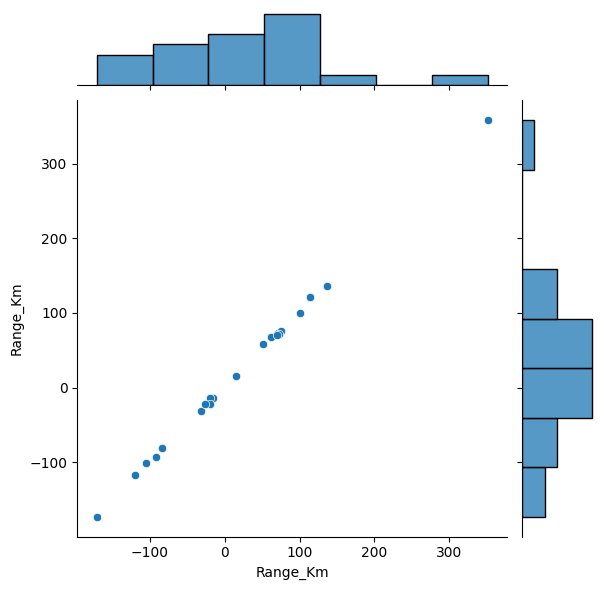

In [72]:
# Jointplot

sns.jointplot(data=ev, x=residual_lasso, y=residual_ridge, kind = 'scatter')

In [ ]:
# https://www.kaggle.com/datasets/geoffnel/evs-one-electric-vehicle-dataset